In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': (9, 6)})

In [2]:
# Analyze Sales Price
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

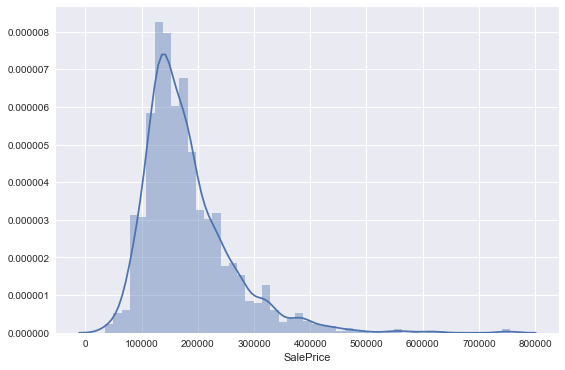

In [4]:
# Plot histogram of Sales prices:
sns.distplot(df_train['SalePrice'])

In [5]:
# skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# List the Variables that are useful:
++:
Neighborhood
OverallQual
YearBuilt
ExterQual
ExterCond
BsmtQual
BsmtCond
TotalBsmtSF
HeatingQC
CentralAir
1stFlrSF
2ndFlrSF
GrLivArea
FullBath
KitchenQual
GarageType
GarageFinish
SaleType
SaleCondition

+:
MSSubClass
MSZoning
Condition1
Condition2
HouseStyle
OverallCond
YearRemodAdd
BsmtExposure
BsmtFinType1
TotRmsAbvGrd
GarageCars

# Correlation matrix

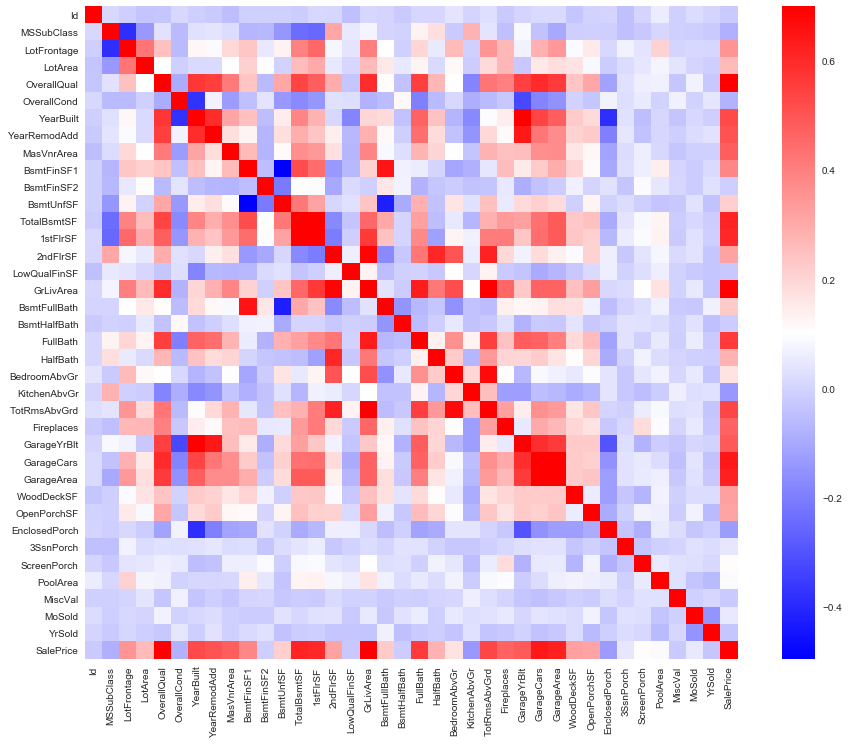

In [6]:
cmap = mcolors.LinearSegmentedColormap.from_list("n",['blue','white','red'])
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(corrmat, vmax=0.7, square=True, cmap=cmap)

In [7]:
k=15
cols = corrmat.nlargest(k, 'SalePrice').index
cm = corrmat.nlargest(k,'SalePrice')[cols]
#cm = np.corrcoef(df_train[cols])

In [8]:
cmap = mcolors.LinearSegmentedColormap.from_list("n",['white','red'])

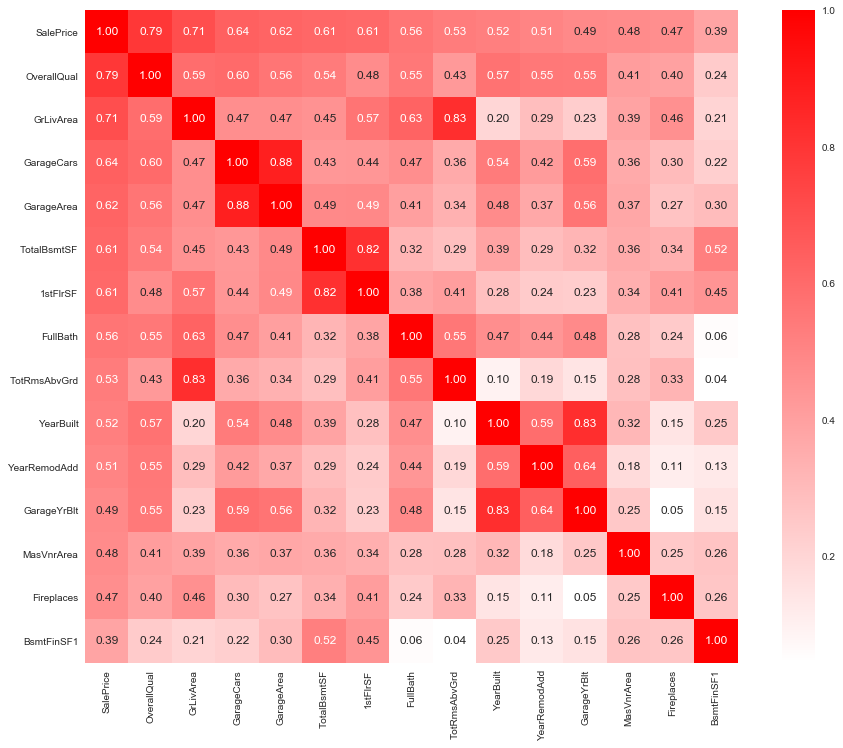

In [9]:
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(cm, square=True, annot=True,fmt='.2f', cbar=True, cmap=cmap)

[OverallQual, GrLivArea, GarageCars, TotalBsmtSF, YearBuilt, YearRemodAdd] are chosen

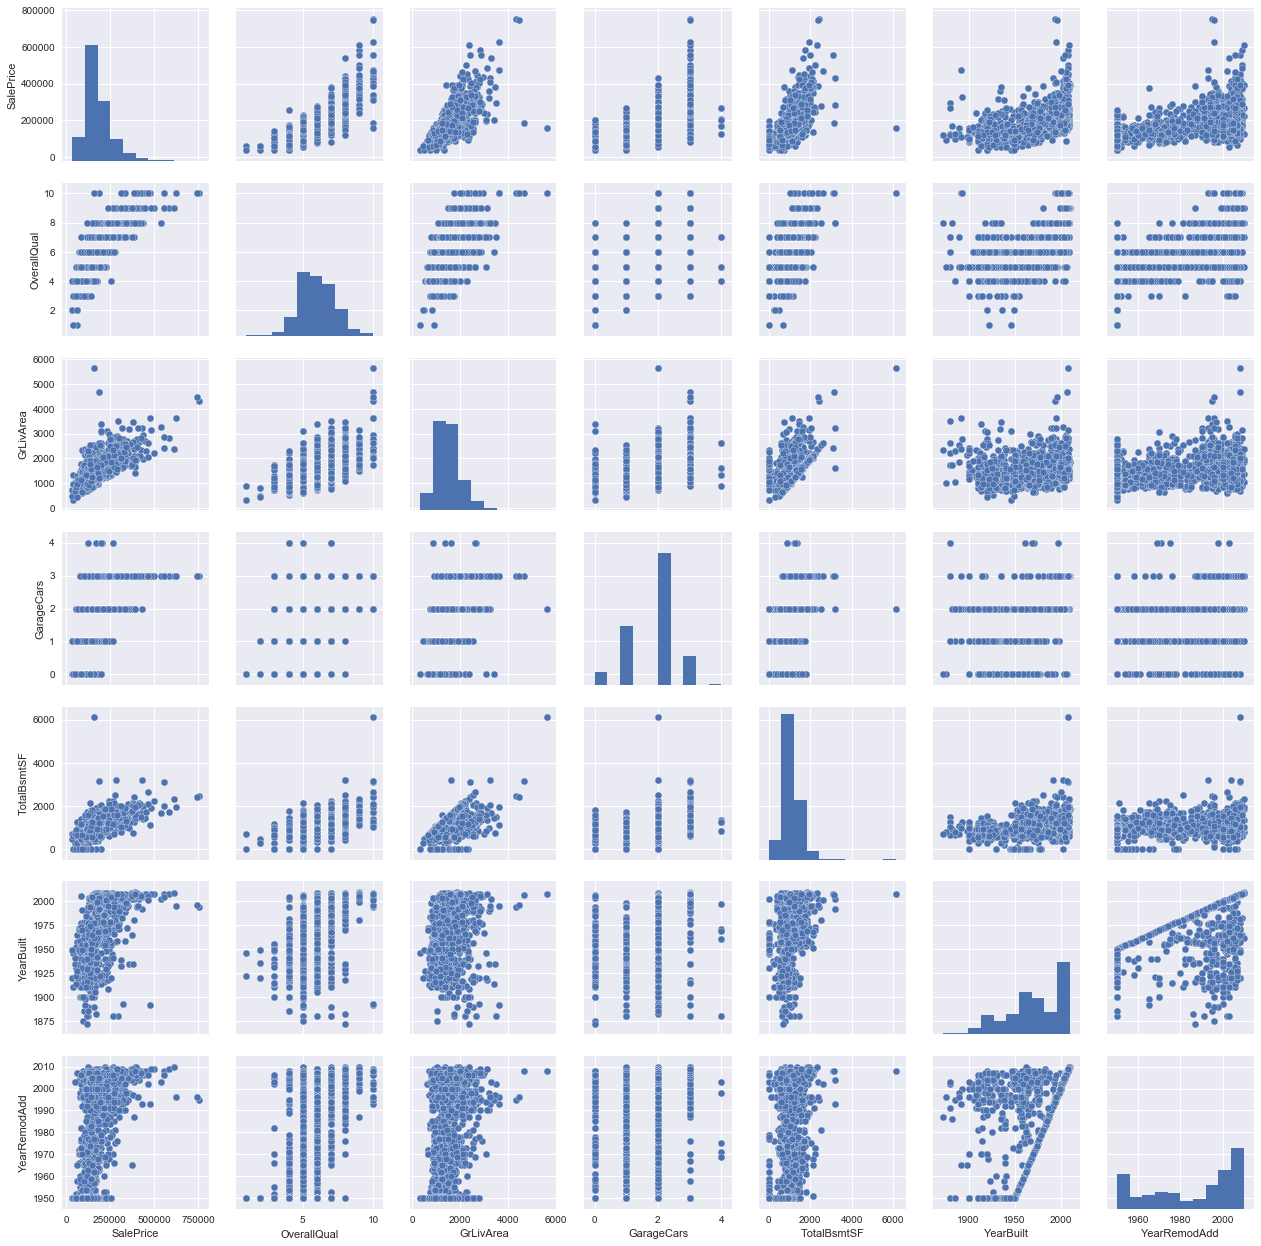

In [10]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(df_train[cols])

# Setup Training and Testing Dataset

In [11]:
# set up training set and testing set
X_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
y_cols = ['SalePrice']
X_train = df_train.loc[:,X_cols]
y_train = df_train.loc[:,y_cols]
X_test = df_test.loc[:,X_cols]

In [12]:
X_train.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [13]:
X_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [14]:
X_train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd
0,7,1710,2,856,2003,2003
1,6,1262,2,1262,1976,1976
2,7,1786,2,920,2001,2002
3,7,1717,3,756,1915,1970
4,8,2198,3,1145,2000,2000


In [15]:
X_test[X_test['GarageCars'].isnull()]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd
1116,5,1828,NaN,859.0,1923,1999


In [16]:
#Fill in null with median()
X_test.loc[X_test['GarageCars'].isnull(), 'GarageCars'] = X_test['GarageCars'].median()

In [17]:
X_test.loc[X_test['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = X_test['TotalBsmtSF'].median()

In [18]:
X_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [19]:
X_train_m = X_train.as_matrix()
y_train_m = y_train.as_matrix()
X_test_m = X_test.as_matrix()

# Linear Model

In [20]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000,]}
reg = GridSearchCV(linear_model.Lasso(), params, scoring='neg_mean_squared_error')
reg.fit(X_train_m, y_train_m)


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [21]:
reg.best_params_

{'alpha': 1e-05}

In [22]:
y_test = reg.predict(X_test_m)

In [23]:
y_test

array([ 103398.14371456,  156630.42586974,  174287.38638076, ...,
        154292.33119929,  109062.388049  ,  245717.42708424])

In [24]:
sample_submission = pd.read_csv('sample_submission.csv')

In [25]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [26]:
sample_submission.loc[:,'SalePrice'] = pd.Series(y_test.T)

In [27]:
sample_submission.to_csv('Lasso.csv', index=False)
# fail, contains negative values

# Try put in categorical variables

In [28]:
X_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd',
          'MSSubClass', 'MSZoning', 'Neighborhood', 'HeatingQC', 'CentralAir', 'BsmtQual', 
          'BsmtCond', 'ExterQual', 'ExterCond', 'KitchenQual', 'GarageType', 'GarageFinish', 
          'SaleType', 'SaleCondition']
y_cols = ['SalePrice']
X_train = df_train.loc[:,X_cols]
y_train = df_train.loc[:,y_cols]
X_test = df_test.loc[:,X_cols]

In [29]:
X_df = pd.concat([X_train, X_test], axis=0)

In [30]:
X_df.isnull().sum()

OverallQual        0
GrLivArea          0
GarageCars         1
TotalBsmtSF        1
YearBuilt          0
YearRemodAdd       0
MSSubClass         0
MSZoning           4
Neighborhood       0
HeatingQC          0
CentralAir         0
BsmtQual          81
BsmtCond          82
ExterQual          0
ExterCond          0
KitchenQual        1
GarageType       157
GarageFinish     159
SaleType           1
SaleCondition      0
dtype: int64

In [31]:
X_df.loc[X_df['BsmtQual'].isnull(), 'BsmtQual'] = 'NA'
X_df.loc[X_df['BsmtCond'].isnull(), 'BsmtCond'] = 'NA'
X_df.loc[X_df['GarageType'].isnull(), 'GarageType'] = 'NA'
X_df.loc[X_df['GarageFinish'].isnull(), 'GarageFinish'] = 'NA'


In [32]:
X_df.isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       1
TotalBsmtSF      1
YearBuilt        0
YearRemodAdd     0
MSSubClass       0
MSZoning         4
Neighborhood     0
HeatingQC        0
CentralAir       0
BsmtQual         0
BsmtCond         0
ExterQual        0
ExterCond        0
KitchenQual      1
GarageType       0
GarageFinish     0
SaleType         1
SaleCondition    0
dtype: int64

In [33]:
X_df.loc[X_df['GarageCars'].isnull(), 'GarageCars'] = X_df['GarageCars'].median()
X_df.loc[X_df['TotalBsmtSF'].isnull(), 'TotalBsmtSF'] = X_df['TotalBsmtSF'].median()
X_df.loc[X_df['MSZoning'].isnull(), 'MSZoning'] = X_df['MSZoning'].mode().values[0]
X_df.loc[X_df['SaleType'].isnull(), 'SaleType'] = X_df['SaleType'].mode().values[0]
X_df.loc[X_df['KitchenQual'].isnull(), 'KitchenQual'] = X_df['KitchenQual'].mode().values[0]


In [34]:
X_df.isnull().sum()

OverallQual      0
GrLivArea        0
GarageCars       0
TotalBsmtSF      0
YearBuilt        0
YearRemodAdd     0
MSSubClass       0
MSZoning         0
Neighborhood     0
HeatingQC        0
CentralAir       0
BsmtQual         0
BsmtCond         0
ExterQual        0
ExterCond        0
KitchenQual      0
GarageType       0
GarageFinish     0
SaleType         0
SaleCondition    0
dtype: int64

In [35]:
X_df = pd.get_dummies(X_df)

X_train_df = X_df.iloc[:X_train.shape[0]]
X_test_df = X_df.iloc[X_train.shape[0]:]

In [36]:
X_train_m = X_train_df.as_matrix()
X_test_m = X_test_df.as_matrix()

In [37]:
params = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000,]}
reg = GridSearchCV(linear_model.Lasso(), params, scoring='neg_mean_squared_error')
reg.fit(X_train_m, y_train_m)


/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [38]:
y_test = reg.predict(X_test_m)

In [39]:
reg.best_params_

{'alpha': 100}

In [40]:
y_test

array([ 109230.61350353,  154229.87334826,  170988.17478544, ...,
        140056.79910993,  108528.26537351,  226517.60273229])

In [41]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_test.T)
sample_submission.to_csv('Lasso.csv', index=False)

# RidgeCV

In [42]:
from sklearn import linear_model
ridge = linear_model.RidgeCV(alphas=[0.0001,0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000], scoring='neg_mean_squared_error')
ridge.fit(X_train_m, y_train_m)
ridge.alpha_

10.0

In [43]:
y_test = ridge.predict(X_test_m)

In [44]:
y_test

array([[ 109514.39776701],
       [ 155105.78496405],
       [ 170165.35480239],
       ..., 
       [ 138509.29532282],
       [ 109146.76494967],
       [ 228932.01321485]])

In [45]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(*(y_test.T))
sample_submission.to_csv('Ridge.csv', index=False)

# Failed Get a score worst than LassoCV

# Get rid of outliars

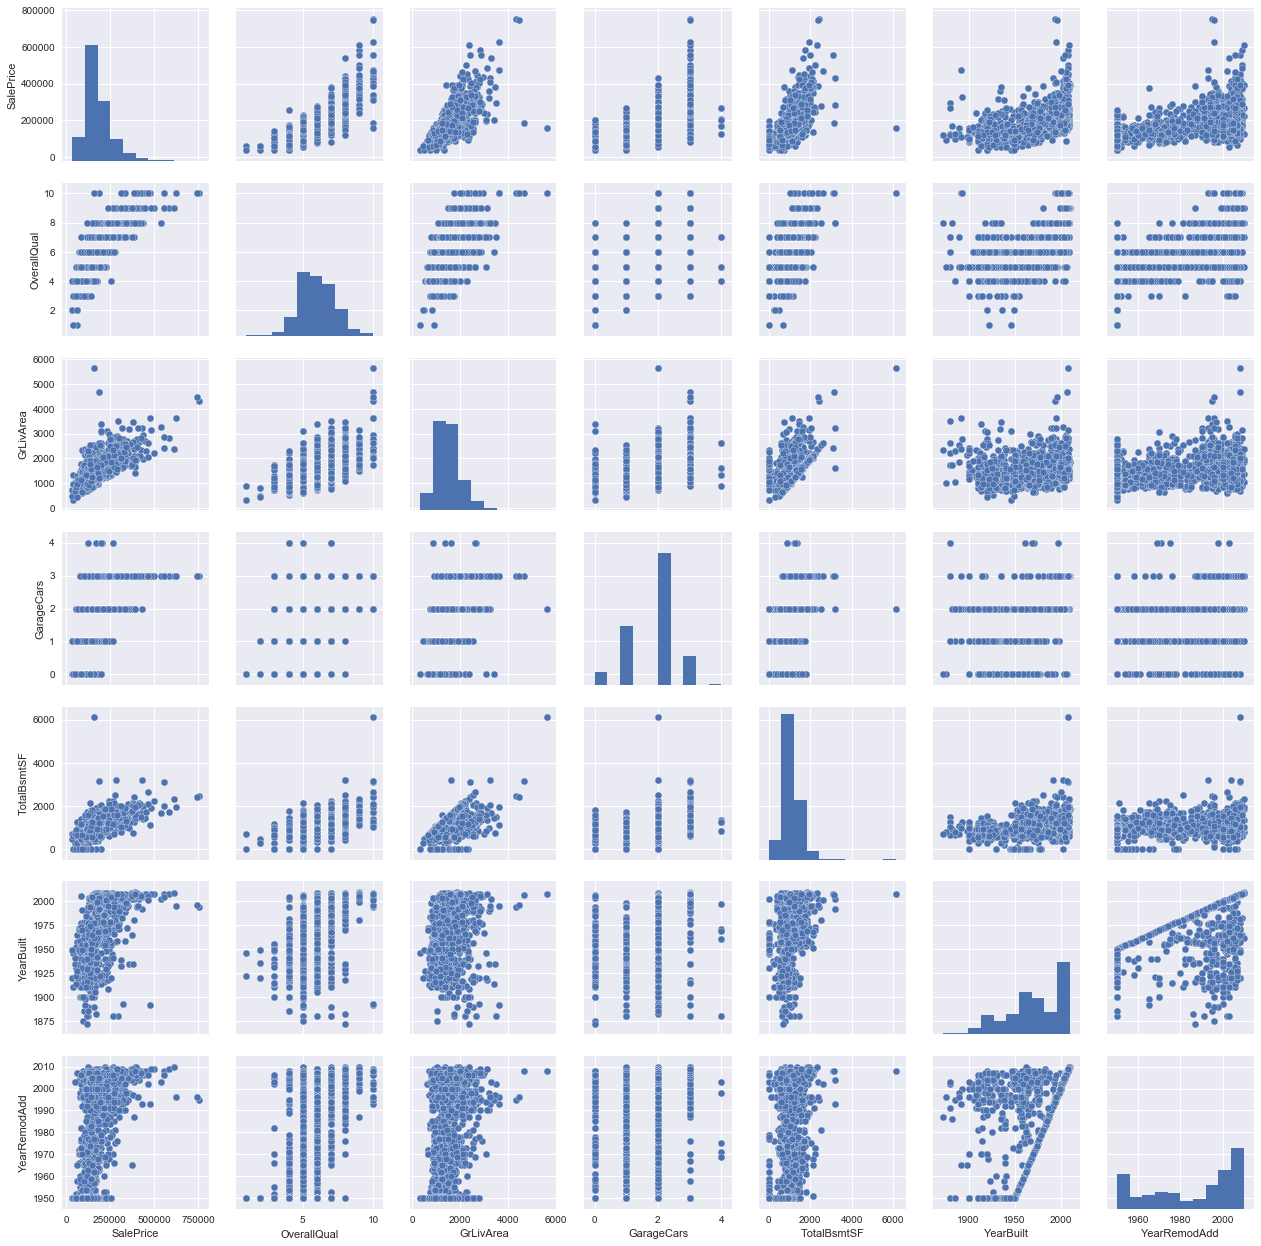

In [46]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(df_train[cols])

In [47]:
X_train_df.sort_values(by='TotalBsmtSF', ascending = False).head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1298,10,5642,2.0,6110.0,2008,2008,60,0,0,0,...,0,1,0,0,0,0,0,0,0,1
332,8,1629,3.0,3206.0,2003,2004,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
496,8,3228,2.0,3200.0,1992,1993,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
523,10,4676,3.0,3138.0,2007,2008,60,0,0,0,...,0,1,0,0,0,0,0,0,0,1
440,10,2402,3.0,3094.0,2008,2008,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [48]:
X_train_df = X_train_df.drop(1298)

In [49]:
X_train_df.sort_values(by='TotalBsmtSF', ascending = False).head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
332,8,1629,3.0,3206.0,2003,2004,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
496,8,3228,2.0,3200.0,1992,1993,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
523,10,4676,3.0,3138.0,2007,2008,60,0,0,0,...,0,1,0,0,0,0,0,0,0,1
440,10,2402,3.0,3094.0,2008,2008,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1373,10,2633,3.0,2633.0,2001,2002,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0


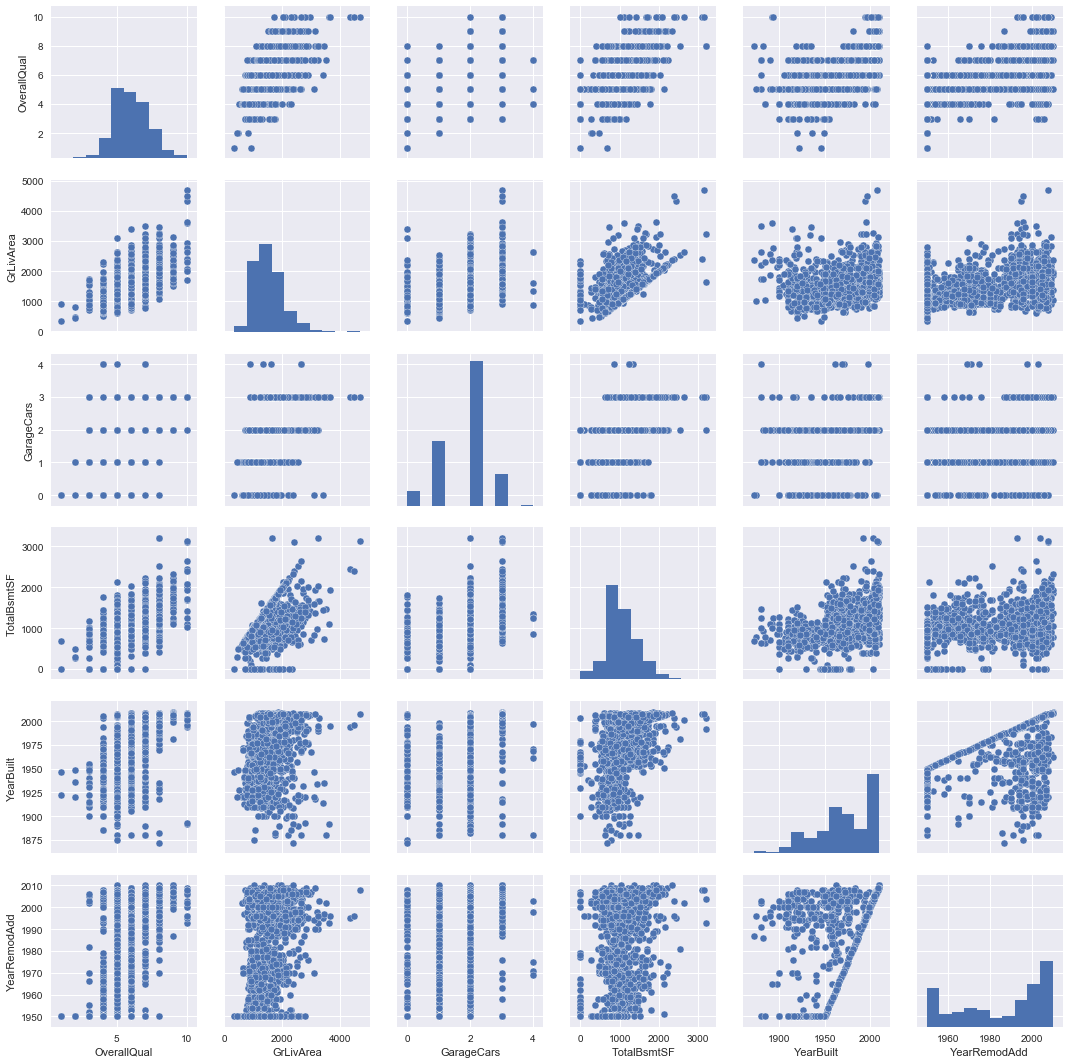

In [50]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
sns.pairplot(X_train_df[cols])

In [51]:
data_plot = pd.concat([X_train_df, y_train], axis=1)
data_plot.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,7.0,1710.0,2.0,856.0,2003.0,2003.0,60.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,6.0,1262.0,2.0,1262.0,1976.0,1976.0,20.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,181500
2,7.0,1786.0,2.0,920.0,2001.0,2002.0,60.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,7.0,1717.0,3.0,756.0,1915.0,1970.0,70.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,140000
4,8.0,2198.0,3.0,1145.0,2000.0,2000.0,60.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


In [52]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
data_plot[cols]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd
0,208500,7.0,1710.0,2.0,856.0,2003.0,2003.0
1,181500,6.0,1262.0,2.0,1262.0,1976.0,1976.0
2,223500,7.0,1786.0,2.0,920.0,2001.0,2002.0
3,140000,7.0,1717.0,3.0,756.0,1915.0,1970.0
4,250000,8.0,2198.0,3.0,1145.0,2000.0,2000.0
5,143000,5.0,1362.0,2.0,796.0,1993.0,1995.0
6,307000,8.0,1694.0,2.0,1686.0,2004.0,2005.0
7,200000,7.0,2090.0,2.0,1107.0,1973.0,1973.0
8,129900,7.0,1774.0,2.0,952.0,1931.0,1950.0
9,118000,5.0,1077.0,1.0,991.0,1939.0,1950.0


In [53]:
data_plot[cols].isnull().sum()

SalePrice       0
OverallQual     1
GrLivArea       1
GarageCars      1
TotalBsmtSF     1
YearBuilt       1
YearRemodAdd    1
dtype: int64

In [54]:
y_train = y_train.drop(1298)

In [55]:
X_train_df.shape

(1459, 93)

In [56]:
y_train.shape

(1459, 1)

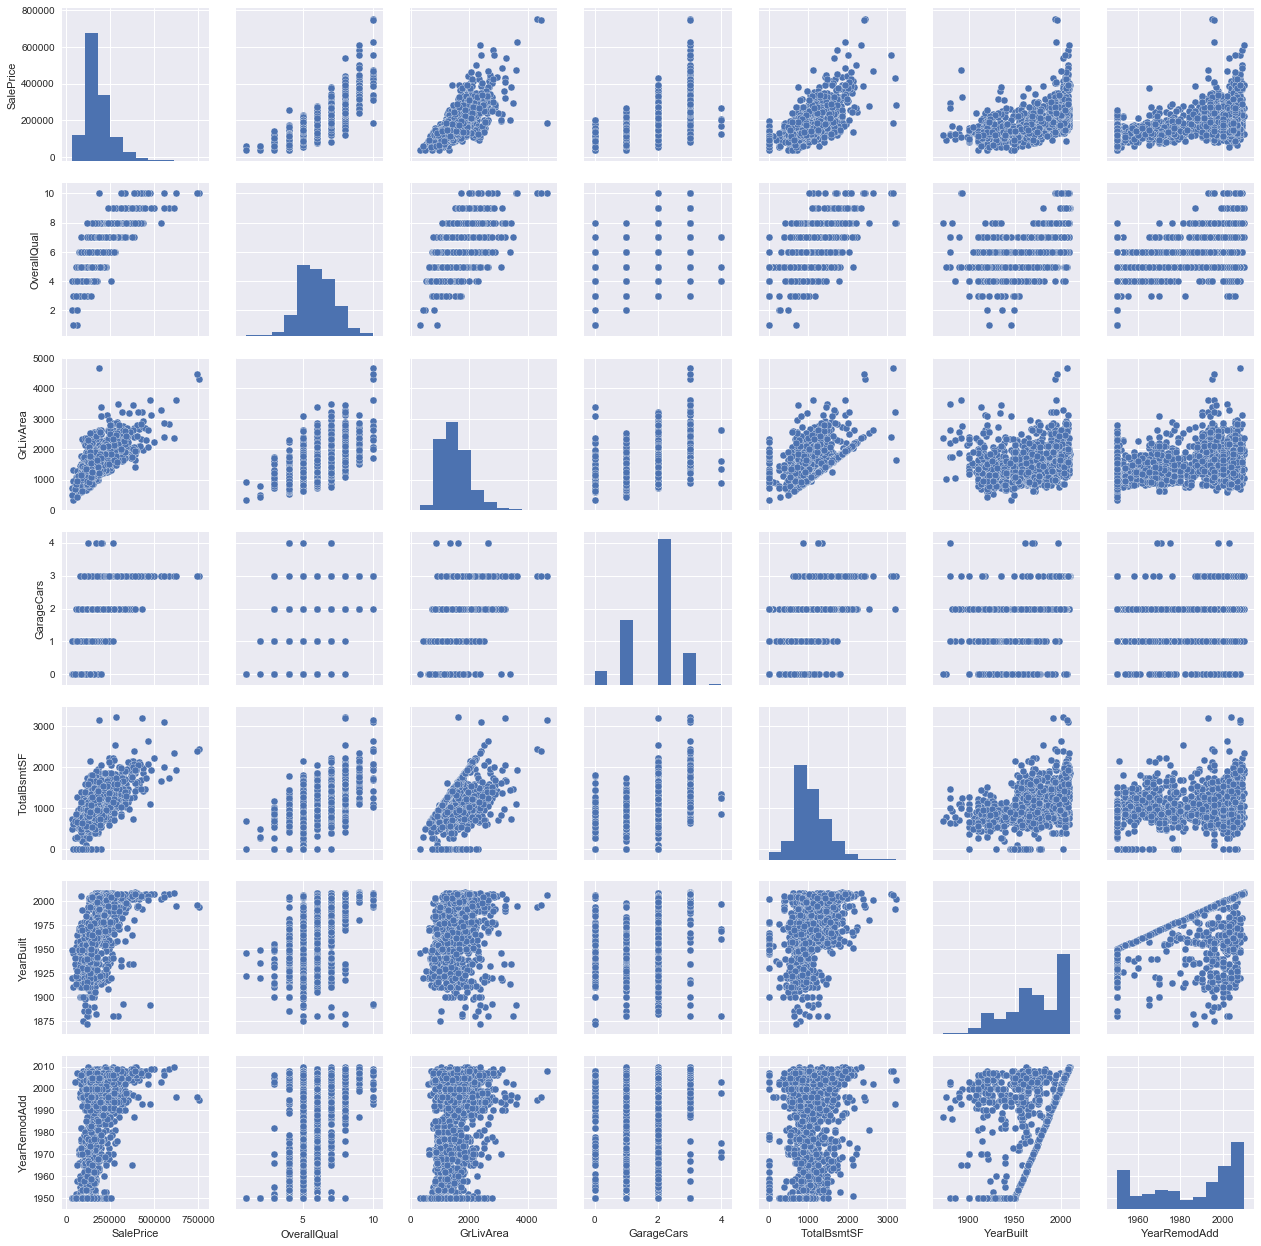

In [57]:
data_plot = pd.concat([X_train_df, y_train], axis=1)
sns.pairplot(data_plot[cols])

In [58]:
data_plot.sort_values(by='GrLivArea', ascending = False).head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
523,10,4676,3.0,3138.0,2007,2008,60,0,0,0,...,1,0,0,0,0,0,0,0,1,184750
1182,10,4476,3.0,2396.0,1996,1996,60,0,0,0,...,0,0,1,1,0,0,0,0,0,745000
691,10,4316,3.0,2444.0,1994,1995,60,0,0,0,...,0,0,1,0,0,0,0,1,0,755000
1169,10,3627,3.0,1930.0,1995,1996,60,0,0,0,...,0,0,1,0,0,0,0,1,0,625000
185,10,3608,3.0,1107.0,1892,1993,75,0,0,0,...,0,0,1,0,0,0,0,1,0,475000


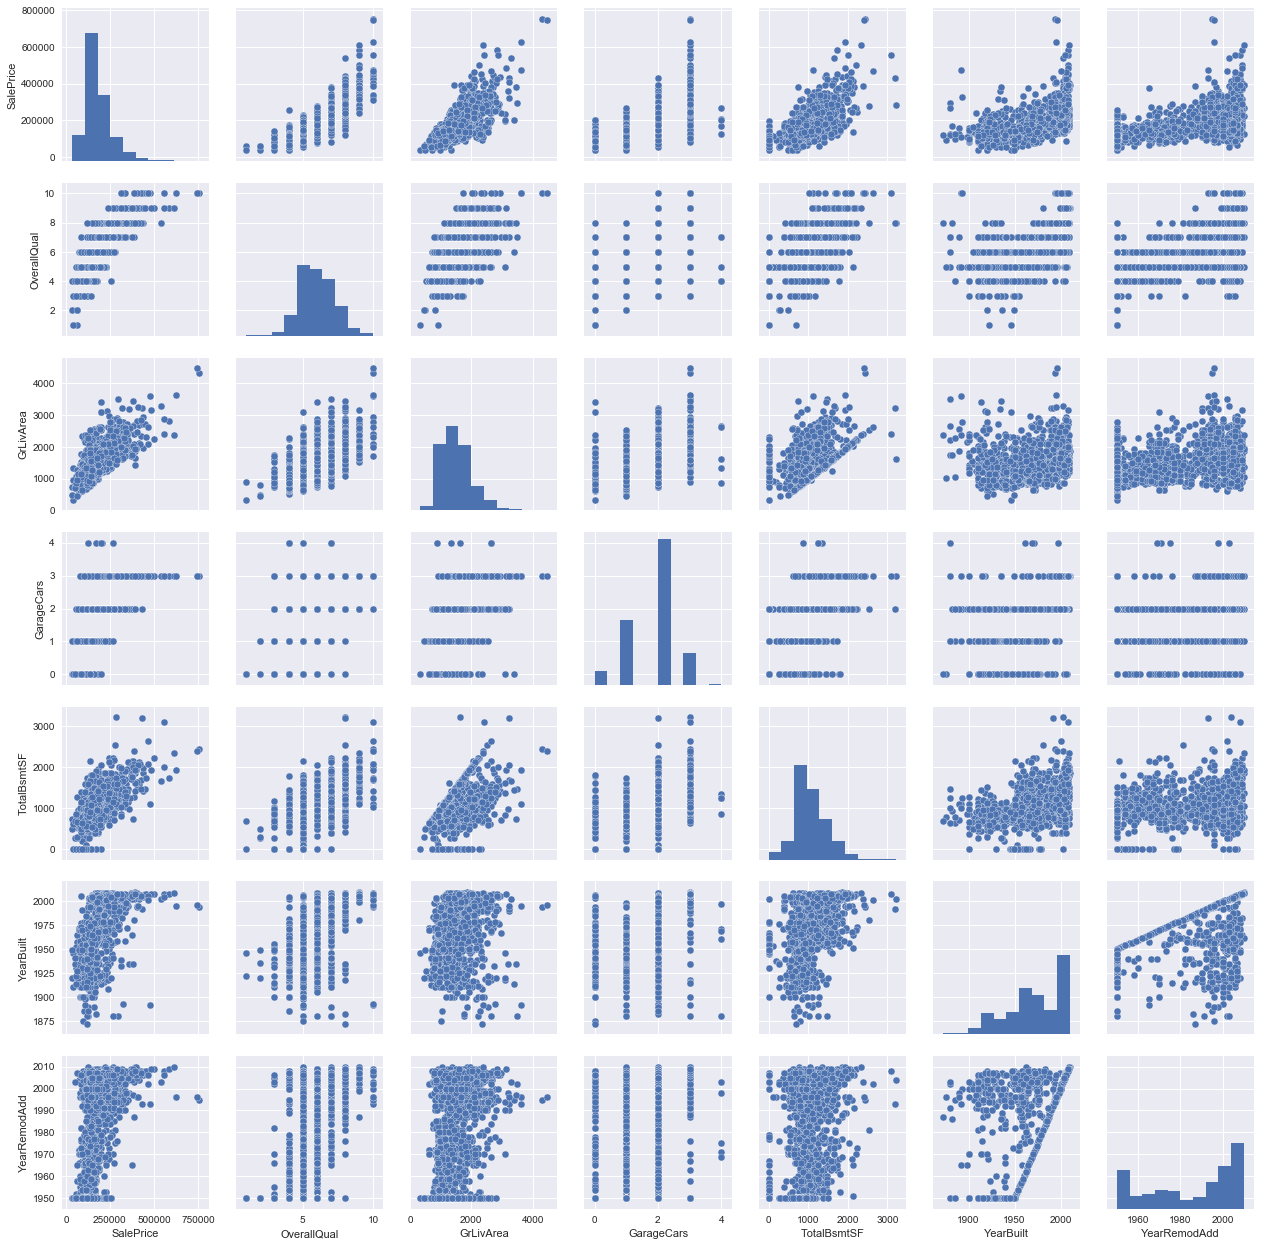

In [59]:
data_plot = data_plot.drop(523)
sns.pairplot(data_plot[cols])

In [60]:
data_plot.shape

(1458, 94)

In [61]:
X_train_df = data_plot.loc[:, data_plot.columns != 'SalePrice']
y_train_df = data_plot.loc[:, 'SalePrice']

In [62]:
X_train_df.head()


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,1710,2.0,856.0,2003,2003,60,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,6,1262,2.0,1262.0,1976,1976,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,7,1786,2.0,920.0,2001,2002,60,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,7,1717,3.0,756.0,1915,1970,70,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,8,2198,3.0,1145.0,2000,2000,60,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [63]:
y_train_df.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [64]:
X_test_df.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,YearRemodAdd,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,896,1.0,882.0,1961,1961,20,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,6,1329,1.0,1329.0,1958,1958,20,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,5,1629,2.0,928.0,1997,1998,60,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,6,1604,2.0,926.0,1998,1998,60,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,8,1280,2.0,1280.0,1992,1992,120,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [65]:
X_train_m = X_train_df.as_matrix()
y_train_m = y_train_df.as_matrix()
X_teset_m = X_test_df.as_matrix()

In [66]:
# Super simple linear regression:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train_m, y_train_m)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
y_pred = reg.predict(X_test_m)
y_pred

array([ 109268.33546566,  159380.3240014 ,  172973.1436576 , ...,
        138934.53660296,  106697.02418876,  221538.39795698])

In [68]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('SimpleLinear.csv', index=False)

# Try lasso again in this training set without the outliers


In [69]:
params = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000,]}
reg = GridSearchCV(linear_model.Lasso(), params, scoring='neg_mean_squared_error')
reg.fit(X_train_m, y_train_m)

/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/Kaggle/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not conver

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [70]:
reg.best_params_

{'alpha': 100}

In [71]:
y_pred = reg.predict(X_test_m)
y_pred

array([ 105355.71019711,  159861.60880531,  173339.52529054, ...,
        140614.49357081,  109952.76213391,  224216.36259876])

In [72]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('LassoRemoveOutliers.csv', index=False)

# Failed, score not improving: 0.16315

# Try ridge again with removing outliers

In [73]:
ridge = linear_model.RidgeCV(alphas=[0.0001,0.001, 0.01, 0.1, 0.25, 1, 10, 100, 1000], scoring='neg_mean_squared_error')
ridge.fit(X_train_m, y_train_m)
ridge.alpha_

10.0

In [74]:
y_pred = ridge.predict(X_test_m)
y_pred

array([ 105118.05761975,  160405.19596158,  172597.53201771, ...,
        139958.90256914,  108540.05142522,  225504.68508418])

In [75]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.loc[:,'SalePrice'] = pd.Series(y_pred)
sample_submission.to_csv('RidgeRemoveOutliers.csv', index=False)

# Failed score not improving: 0.16944

# Try transforming the data to a normalized distribution

## Log transformation for SalePrice

In [78]:
from scipy.stats import norm
from scipy import stats
y_train_df_n = np.log(y_train_df)

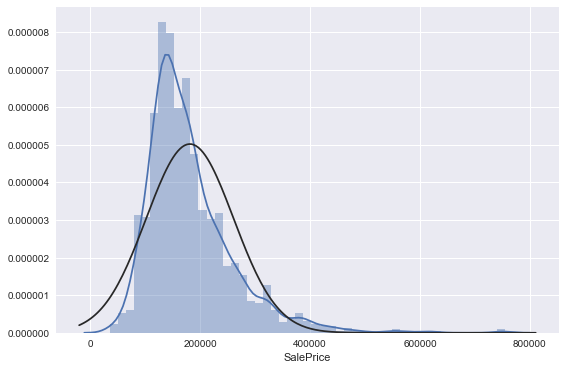

In [79]:
sns.distplot(y_train_df, fit=norm)

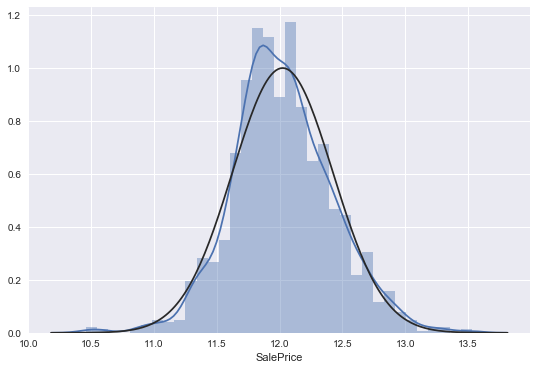

In [80]:
sns.distplot(y_train_df_n, fit=norm)

## Log transformation for GrLivArea

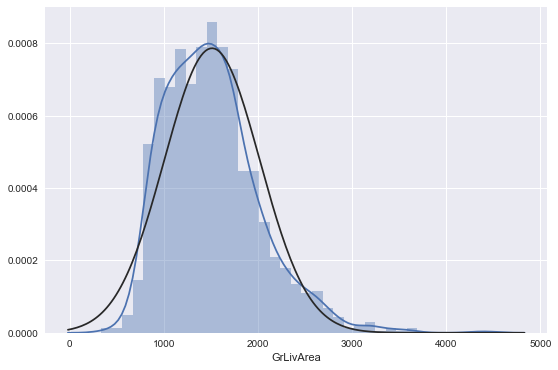

In [81]:
sns.distplot(X_train_df['GrLivArea'], fit=norm)

In [83]:
X_train_df_n = X_train_df.copy()

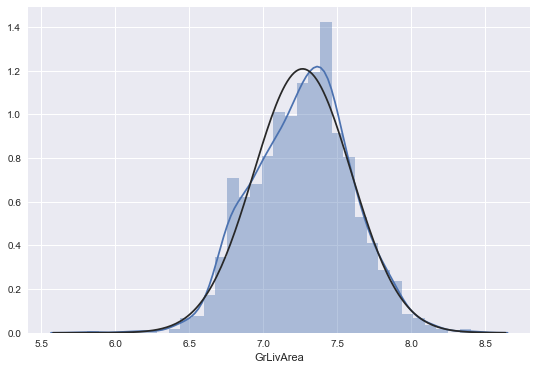

In [84]:
X_train_df_n.loc[:, 'GrLivArea'] = np.log(X_train_df_n.loc[:, 'GrLivArea'])
sns.distplot(X_train_df_n['GrLivArea'],fit=norm)

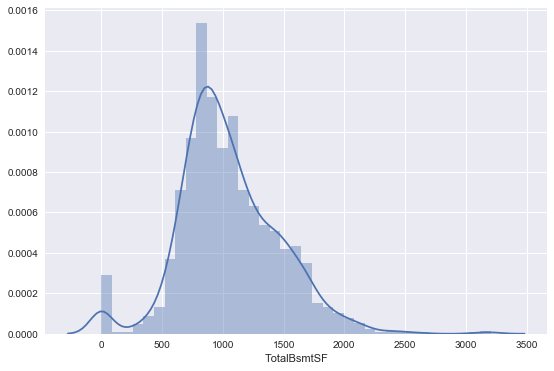

In [86]:
# TotalBsmtSF
sns.distplot(X_train_df_n['TotalBsmtSF'])

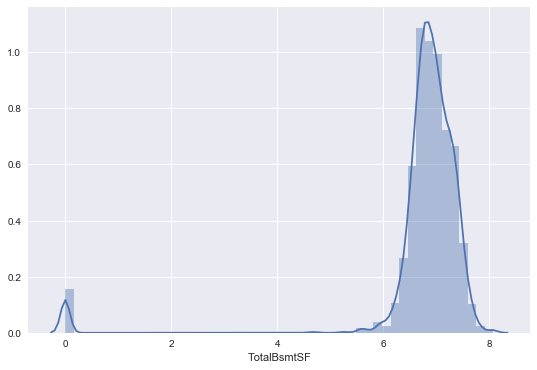

In [88]:
sns.distplot(np.log(X_train_df_n['TotalBsmtSF']+1))

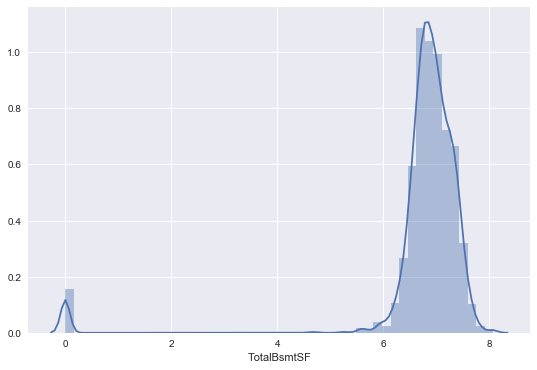

In [89]:
X_train_df_n.loc[:, 'TotalBsmtSF'] = np.log(X_train_df_n['TotalBsmtSF']+1)
sns.distplot(X_train_df_n['TotalBsmtSF'])

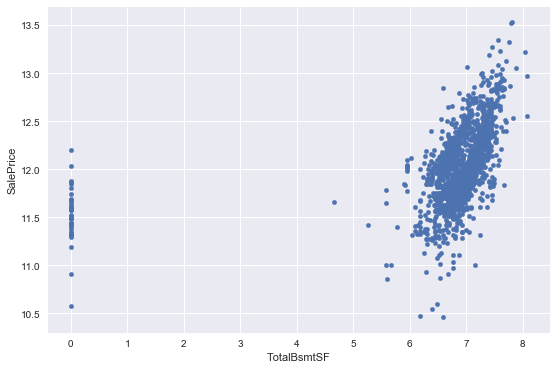

In [90]:
data_plot = pd.concat([X_train_df_n, y_train_df_n], axis=1)
data_plot.plot.scatter(x='TotalBsmtSF', y='SalePrice')

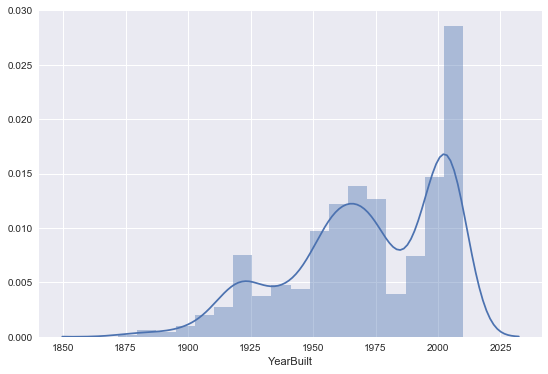

In [91]:
sns.distplot(X_train_df_n['YearBuilt'])

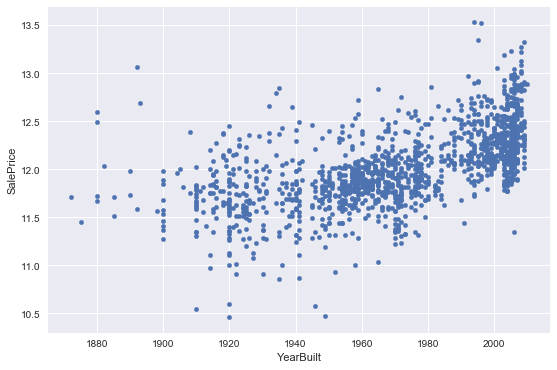

In [92]:
data_plot.plot.scatter(x='YearBuilt', y='SalePrice')

In [93]:
X_df = pd.concat([X_train_df, X_test_df], axis=0)

In [95]:
# Get rid of the year parameters that seems not doing anything.
X_df = X_df.drop(['YearBuilt', 'YearRemodAdd'], axis=1)
X_df.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,1710,2.0,856.0,60,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,6,1262,2.0,1262.0,20,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,7,1786,2.0,920.0,60,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,7,1717,3.0,756.0,70,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,8,2198,3.0,1145.0,60,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
